# Linear Regression

- [Load Datasets](#Load-Datasets)
- [3.6.2 Simple Linear Regression](#3.6.2-Simple-Linear-Regression)
- [3.6.3 Multiple Linear Regression](#3.6.3-Multiple-Linear-Regression)
- [3.6.4 Interaction Terms](#3.6.4-Interaction-Terms)
- [3.6.5 Non-linear Transformations of the Predictors](#3.6.5-Non-linear-Transformations-of-the-Predictors)
- [3.6.6 Qualitative Predictors](#3.6.6-Qualitative-Predictors)

In [1]:
# perform imports and set-up

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston # boston data set is part of sklearn
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# plt.style.use('ggplot') # emulate pretty r-style plots

/home/gperaza/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load Datasets

In [2]:
# Load the carseats data set
carseats_df = pd.read_csv('../data/Carseats.csv',index_col = 0)

FileNotFoundError: File b'../data/Carseats.csv' does not exist

## Simple Linear Regression

The Boston data set is part of the `sklearn` module. This data set records `medv` (median house value) for 506 neighborhoods around Boston. We will seek to predict `medv` using 13 predictors such as `rm` (average number of rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socioeconomic status).

In [3]:
# Load Boston housing data set
boston = load_boston()

#Transform the data into a dataframe for analysis¶

# combine the predictors and responses for a dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# now get the column names of the data frame
col_names = np.append(boston.feature_names, 'MEDV')

# create the data frame
boston_df = pd.DataFrame(boston_data, columns = col_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

We will start by using the `statsmodels` module to fit a simple linear regression model, with `medv` as the response and `lstat` as the predictor. The basic syntax is `smf.ols('y~x', data)`, where `y` is the response, `x` the predictor, and `data` is the data frame in which these two variables are kept.

In [5]:
lm_fit = smf.ols('MEDV~LSTAT', boston_df).fit()

To print some information about the model, we use the `summary()` method. This gives us p-values and standard errors for the coefficients, as well as the $R^2$ statistic and F-statistic for the model.

In [6]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 11 Jan 2018   Prob (F-statistic):           5.08e-88
Time:                        09:50:17   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can access many of this values directly, for example, to get a list of the parameters:

In [7]:
lm_fit.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In order to obtain a 95% confidence interval for the coefficient estimates, we can use the `conf_int()` method.

In [8]:
lm_fit.conf_int()

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


The fitted values of the model are stored in

In [9]:
lm_fit.fittedvalues

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
5      29.604084
6      22.744727
7      16.360396
8       6.118864
9      18.307997
10     15.125332
11     21.946686
12     19.628566
13     26.706433
14     24.806335
15     26.506923
16     28.302516
17     20.616617
18     23.447764
19     23.837284
20     14.583803
21     21.414658
22     16.768917
23     15.666860
24     19.068036
25     18.868526
26     20.483610
27     18.136988
28     22.393209
29     23.172250
         ...    
476    16.806919
477    10.888111
478    17.424451
479    22.098694
480    24.350311
481    27.200459
482    27.893995
483    24.654327
484    21.880183
485    24.502319
486    20.322102
487    23.675776
488    17.395950
489    11.781158
490     6.356376
491    17.386449
492    21.870682
493    23.143748
494    21.642670
495    17.832972
496    14.469798
497    21.158145
498    22.279203
499    20.208096
500    20.939634
501    25.366864
502    25.927393
503    29.1955

The `statsmodels` module can be used to produce confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat` (predictions).

In [10]:
predictors = pd.DataFrame({'LSTAT':[5,10,15]})
predictions = lm_fit.get_prediction(predictors)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


For instance, the 95 % confidence interval associated with a lstat value of 10 is (24.47, 25.63), and the 95 % prediction interval is (12.828, 37.28). As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for medv when lstat equals 10), but the latter are substantially wider.

We will now plot medv and lstat along with the least squares regression line using the plot() function.

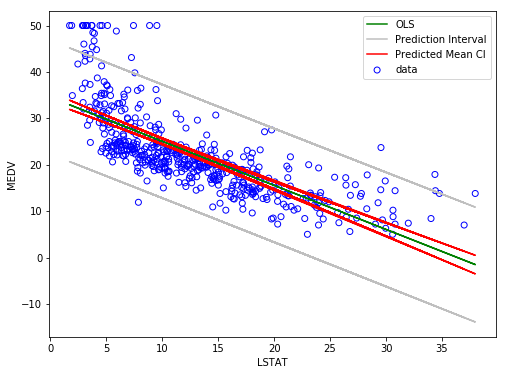

In [17]:
# Create a plot to plot the data, OLS estimate, prediction and confidence intervals
fig, ax = plt.subplots(figsize=(8,6))

# get numpy array values from dataframe
x = boston_df.LSTAT

# Plot the data
ax.scatter(x, boston_df.MEDV, facecolors='none', edgecolors='b', label="data")
# plot the models fitted values
ax.plot(x, lm_fit.fittedvalues, 'g', label="OLS")

# To plot prediction and confidence intrvals we need predictions for all data points
predictions = lm_fit.get_prediction(boston_df).summary_frame(alpha=0.05)

# plot the high and low prediction intervals
ax.plot(x, predictions.obs_ci_lower, color='0.75', label="Prediction Interval")
ax.plot(x, predictions.obs_ci_upper, color='0.75', label="")

# plot the high and low mean confidence intervals
ax.plot(x, predictions.mean_ci_lower, color='r',label="Predicted Mean CI")
ax.plot(x, predictions.mean_ci_upper, color='r', label="")

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

Next we examine some diagnostic plots, several of which were discussed in Section 3.3.3. Three important diagnostic plots are implemented below:

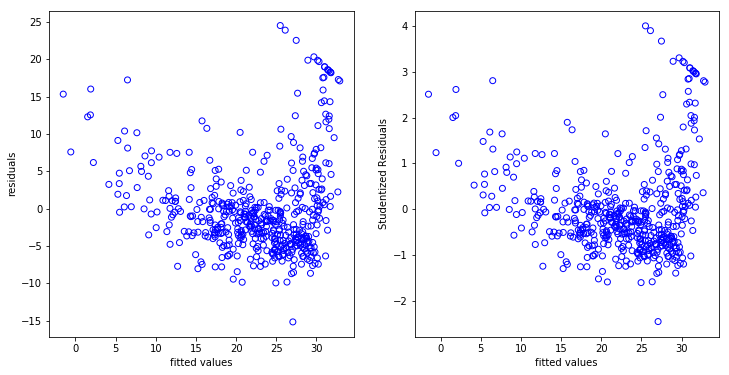

In [44]:
# We need this for leverage and studentized residuilas calculations.
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(lm_fit)
leverage = influence.hat_matrix_diag
stud_res = influence.resid_studentized_external

# Create plots of residuals
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the residual for each fitted value
ax1.scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# The residual plot indicates significant nonlinearity (a u-shape pattern is clear)

# Plot the studentized residuals
ax2.scatter(lm_fit.fittedvalues, stud_res, facecolors='none', edgecolors='b');
ax2.set_ylabel('Studentized Residuals');
ax2.set_xlabel('fitted values');

# |studentized residual| > 3 are generally considered outliers

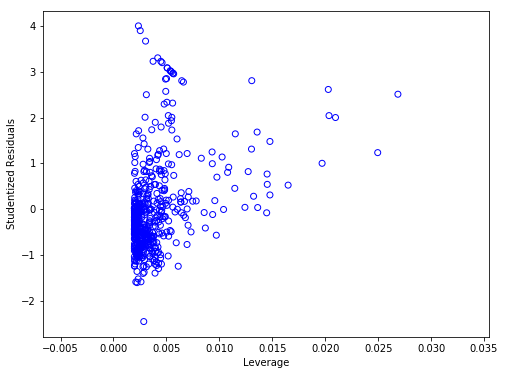

In [46]:
# We can also examine the leverages to identify points that may alter the regression line

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, stud_res,facecolors='none', edgecolors='b');
ax.set_xlabel('Leverage');
ax.set_ylabel('Studentized Residuals');

To asses the normality of the residuals we can use a Normal Probability plot.

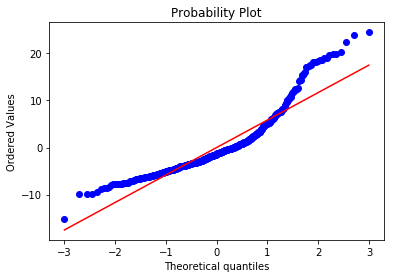

In [71]:
from scipy.stats import probplot

_ = probplot(lm_fit.resid, plot=plt)

## 3.6.3 Multiple Linear Regression

#### Here we will estimate MEDV using multiple linear regression. In the first example we will regress LSTAT and AGE onto MEDV.

Model parameters:
 const    33.222761
LSTAT    -1.032069
AGE       0.034544
dtype: float64


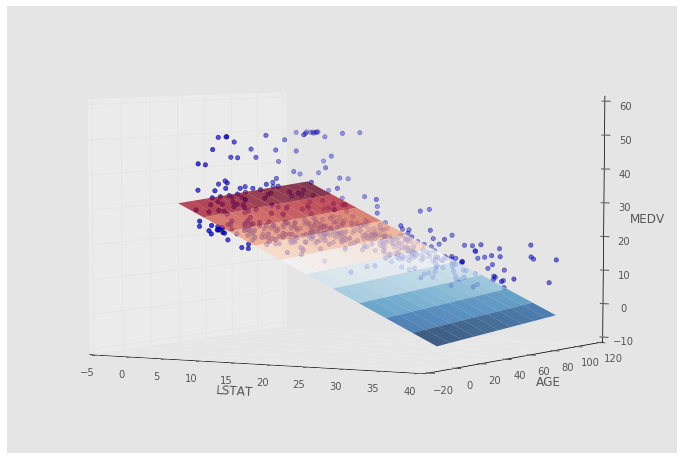

In [9]:
# create our design matrix using LSTAT and AGE predictors
X = sm.add_constant(boston_df[['LSTAT','AGE']])

# set the dependent variable
Y = boston_df.MEDV

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d',azim=-60, elev=5)

# create the model instance and estimate
model = sm.OLS(Y,X)
estimate = model.fit()
# data about the model is stored in summary
print('Model parameters:\n', estimate.params[:])

# Plot the data
ax.scatter(X.loc[:,'LSTAT'], X.loc[:,'AGE'], Y.values, facecolors=(0,0,0,0),\
           edgecolor='k', depthshade=True);
ax.set_xlabel('LSTAT');
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')

# Plot the OLS estimate
# create a grid of points
xx1, xx2 = np.meshgrid(np.linspace(X.LSTAT.min(), X.LSTAT.max(), 100), 
                       np.linspace(X.AGE.min(), X.AGE.max(), 100))

# plot the plane by evaluating the parameters over the grid
Z = estimate.params[0] + estimate.params[1] * xx1 + estimate.params[2] * xx2
# plot plane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.75, linewidth=0)



#### Now we will perform the regression over all 13 predictors in the boston housing dataset.

In [10]:
# create our design matrix using all the predictors (last column is MEDV)
X = sm.add_constant(boston_df.iloc[:,0:-1])

# create the model instance and estimate
model = sm.OLS(Y,X)
est = model.fit()
# data about the model is stored in summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 24 Jun 2016   Prob (F-statistic):          6.95e-135
Time:                        10:05:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [11]:
# Compute all the variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIFs = [(predictor, variance_inflation_factor(X.values,_)) \
        for _,predictor in enumerate(list(X))] # list(X) returns column names of df

print('Variance Inflation Factors')
for tup in VIFs:
    print('{:10}'.format(tup[0]), '{:.3f}'.format(tup[1]))

Variance Inflation Factors
const      585.425
CRIM       1.773
ZN         2.299
INDUS      3.991
CHAS       1.074
NOX        4.395
RM         1.934
AGE        3.101
DIS        3.957
RAD        7.481
TAX        9.008
PTRATIO    1.799
B          1.346
LSTAT      2.938


## 3.6.4 Interaction Terms

#### Statsmodels uses the patsy package to convert formulas to matrices for fitting. This allows for easy implementation of arbitrary functions of the predictors.

In [12]:
# import statsmodels patsy api
import statsmodels.formula.api as smf

In [13]:
# Construct model and fit
model = smf.ols(formula='MEDV ~ LSTAT*AGE', data=boston_df)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 24 Jun 2016   Prob (F-statistic):           4.86e-88
Time:                        10:05:13   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## 3.6.5 Non-linear Transformations of the Predictors

#### Statsmodel patsy api allows us to include non-linear terms

In [14]:
model = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', data=boston_df)
quadratic_results = model.fit()
print(quadratic_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 24 Jun 2016   Prob (F-statistic):          1.56e-112
Time:                        10:05:13   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

#### The near zero p-value for the quadratic term suggest an improved model. We will plot and perform some diagnostics of the fit.

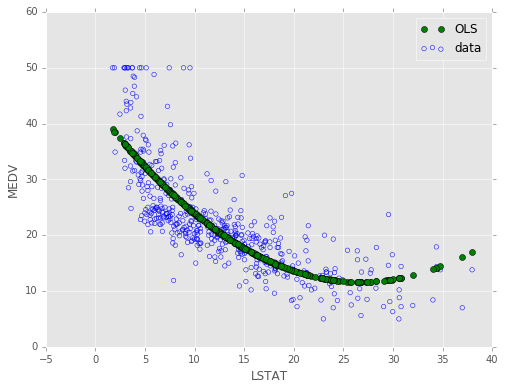

In [15]:
fig, ax = plt.subplots(figsize=(8,6))

# get numpy array values from dataframe
x = boston_df.LSTAT.values
y = boston_df.MEDV.values

# Plot the data
ax.scatter(x, y, facecolors='none', edgecolors='b', label="data");
# plot the models fitted values
ax.plot(x, quadratic_results.fittedvalues, 'g', marker='o',linestyle='none', label="OLS");

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

#### Diagnostic tests of quadratic estimate

In [16]:
# import anova function
from statsmodels.stats.api import anova_lm

# perform the hypothesis test (see https://en.wikipedia.org/wiki/F-test regression section)
anova_table = anova_lm(linear_results, quadratic_results)
print(anova_table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0       504  19472.381418        0         NaN         NaN           NaN
1       503  15347.243158        1  4125.13826  135.199822  7.630116e-28


#### The F-statistic is 135 with a p-value of ~0 indicating there is a large difference in the unexplained variances of the two models. This is not too suprising given the plot above. Now consider the residuals.

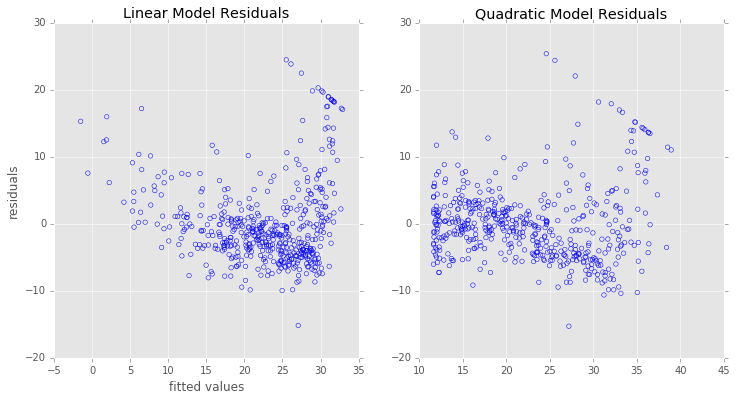

In [19]:
# Create plots of residuals
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# RESIDUALS OF LINEAR MODEL
# The results contain the residuals
linear_fit_values = linear_results.fittedvalues.values
residuals = linear_results.resid.values

# Plot the residual for each fitted value for the linear model
ax1.scatter(linear_fit_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
ax1.set_title('Linear Model Residuals')

# RESIDUALS OF QUADRATIC MODEL
# The results contain the residuals
quadratic_fit_values = quadratic_results.fittedvalues.values
quadratic_residuals = quadratic_results.resid.values
ax2.scatter(quadratic_fit_values, quadratic_residuals, facecolors='none', edgecolors='b');
ax2.set_title('Quadratic Model Residuals');

#### We can also try higher order polynomial fits:

In [20]:
formula = 'MEDV ~ 1 + ' + ' + '.join('I(LSTAT**{})'.format(i) for i in range(1, 6))
print(formula)
model = smf.ols(formula, data=boston_df)
order_5_results = model.fit()
print(order_5_results.summary())

MEDV ~ 1 + I(LSTAT**1) + I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 24 Jun 2016   Prob (F-statistic):          8.73e-122
Time:                        10:57:12   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------

## 3.6.6 Qualitative Predictors

In [31]:
# Examine the head of the carseats data set
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [86]:
# Construct the formula with two interaction terms
formula ='Sales ~' + '+'.join(list(carseats_df.iloc[:,1:].columns.tolist()) + ['Income:Advertising'] + ['Price:Age'])
print(formula)

print()

model = smf.ols(formula, data=carseats_df)
carseat_results = model.fit()
print(carseat_results.summary())

Sales ~CompPrice+Income+Advertising+Population+Price+ShelveLoc+Age+Education+Urban+US+Income:Advertising+Price:Age

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 24 Jun 2016   Prob (F-statistic):          6.14e-166
Time:                        14:38:28   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
------

In [85]:
# The default treatment for categoricals in patsy is the reference=0. In this case the dummy variable for bad is 0.
# more treatments can be found in the patsy documentation. ....from patsy.contrasts import Treatment